In [20]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Preparation Complete for Wine Dataset ---")
print(f"Feature names: {wine.feature_names}")
print(f"Target names (classes): {wine.target_names}")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

--- Data Preparation Complete for Wine Dataset ---
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names (classes): ['class_0' 'class_1' 'class_2']
Training data shape: (142, 13)
Test data shape: (36, 13)


In [21]:
df = pd.DataFrame(data=X, columns=wine.feature_names)

df['target_class'] = y

print("\n--- First 5 rows of the Wine dataset DataFrame ---")
print(df.head())


--- First 5 rows of the Wine dataset DataFrame ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/o

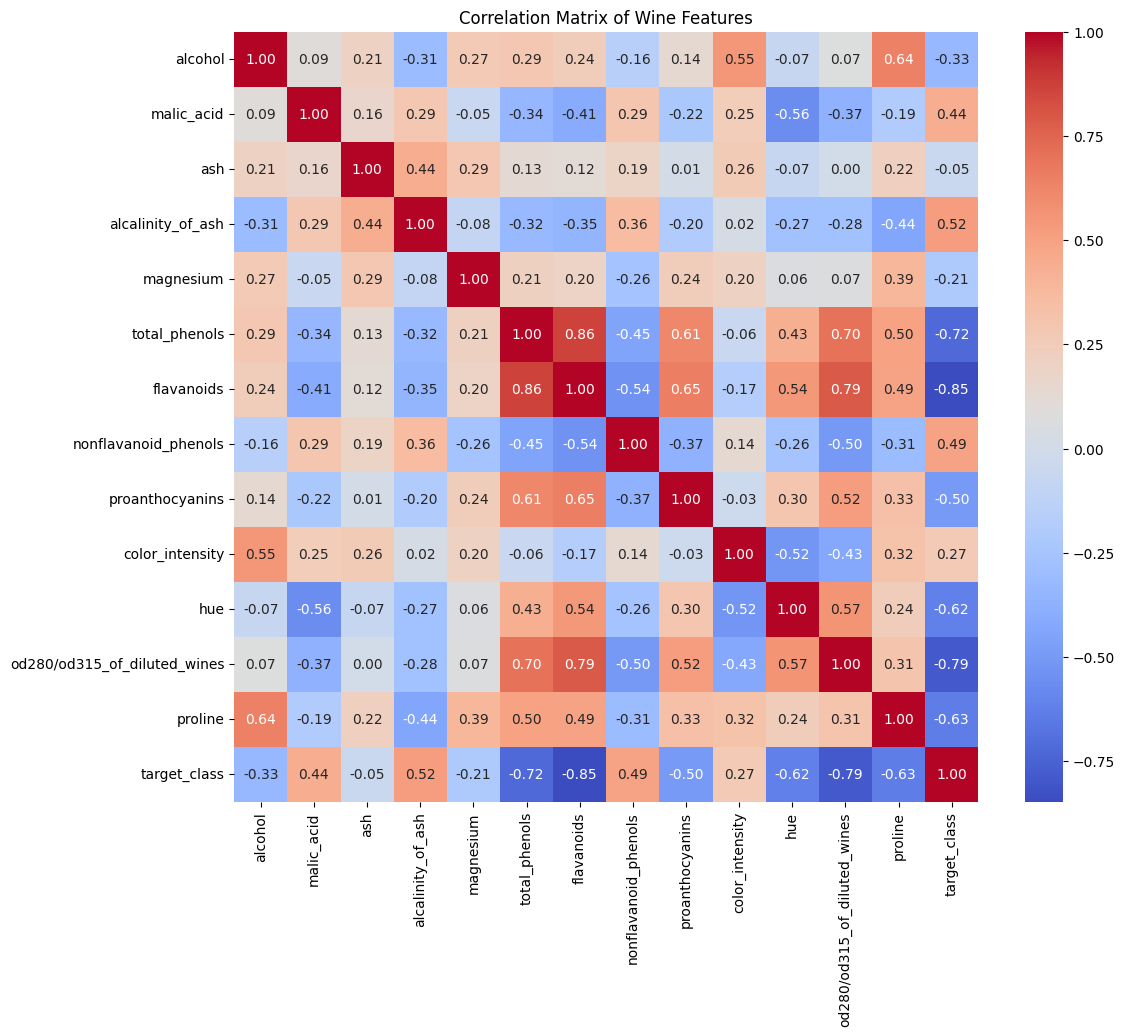

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data=X, columns=wine.feature_names)
df['target_class'] = y

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

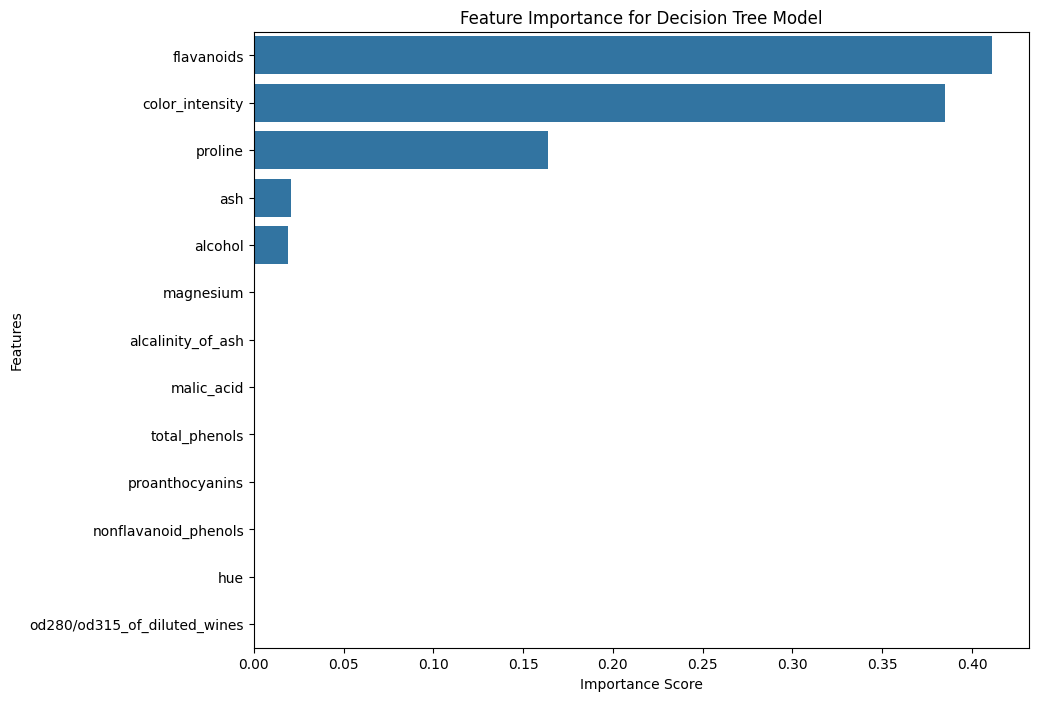

In [ ]:

importances = sklearn_tree.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': wine.feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance for Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

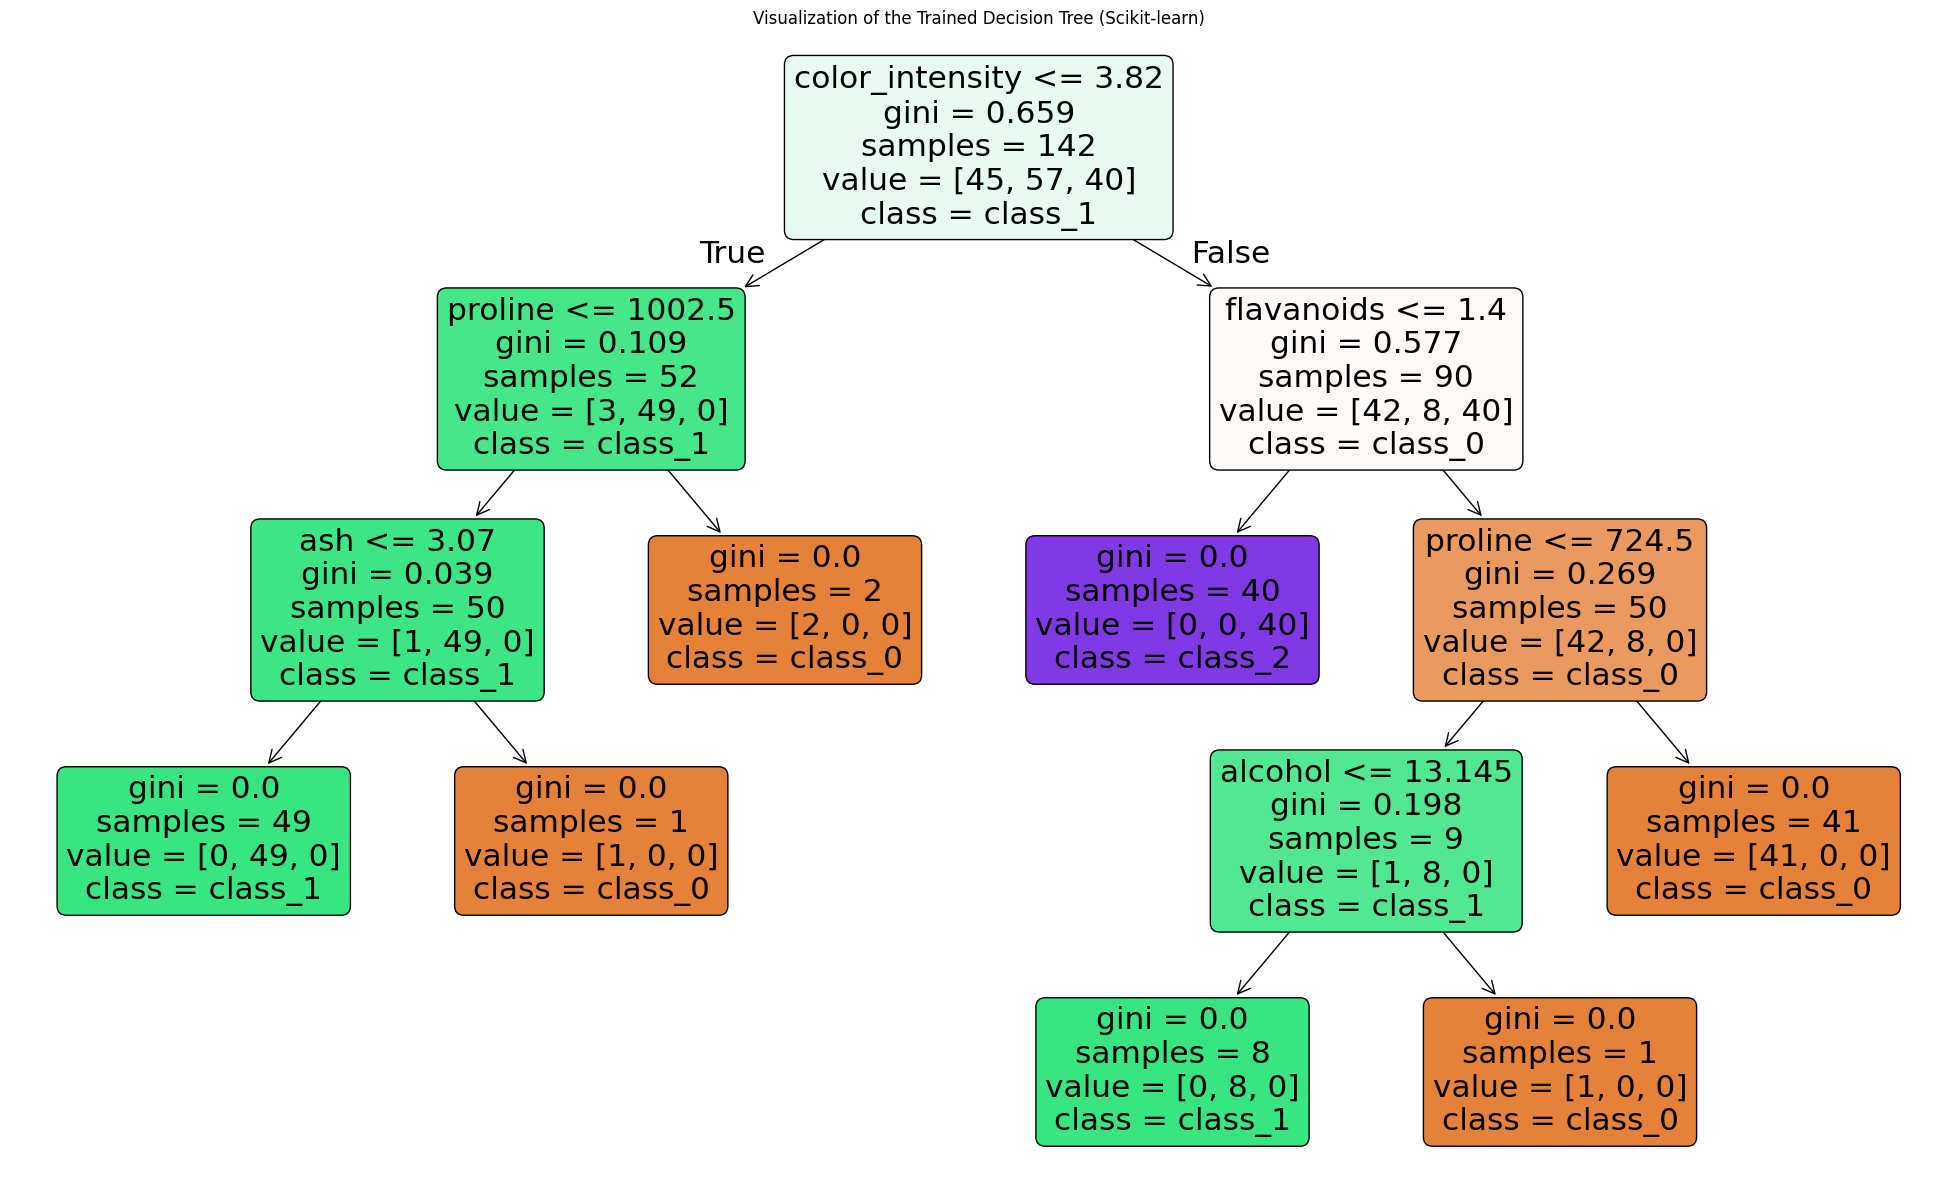

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))

plot_tree(
    sklearn_tree, 
    filled=True, 
    rounded=True, 
    class_names=wine.target_names, 
    feature_names=wine.feature_names
)

plt.title("Visualization of the Trained Decision Tree (Scikit-learn)")
plt.show()

In [25]:

def gini(y):
    counts = Counter(y)
    impurity = 1.0
    num_samples = len(y)
    if num_samples == 0:
        return 0

    for label in counts:
        prob_of_label = counts[label] / num_samples
        impurity -= prob_of_label**2
        
    return impurity

In [26]:

def _best_split(X, y):
    m, n_features = X.shape
    
    parent_gini = gini(y)
    best_gain = -1
    best_split_info = {}

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        
        for threshold in thresholds:
            left_indices = np.where(X[:, feature_index] <= threshold)[0]
            right_indices = np.where(X[:, feature_index] > threshold)[0]
            
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
                
            y_left, y_right = y[left_indices], y[right_indices]
            p_left = len(left_indices) / m
            p_right = len(right_indices) / m
            children_gini = p_left * gini(y_left) + p_right * gini(y_right)
            
            gain = parent_gini - children_gini
            
            if gain > best_gain:
                best_gain = gain
                best_split_info = {
                    'feature_index': feature_index,
                    'threshold': threshold,
                    'left_indices': left_indices,
                    'right_indices': right_indices,
                    'gain': gain
                }
                
    return best_split_info

first_split = _best_split(X_train, y_train)

print("--- Best First Split Information ---")
print(f"Feature to split on (index): {first_split['feature_index']}")
print(f"Threshold value: {first_split['threshold']:.2f}")
print(f"Information Gain: {first_split['gain']:.4f}")
print(f"Number of samples in left child: {len(first_split['left_indices'])}")
print(f"Number of samples in right child: {len(first_split['right_indices'])}")

--- Best First Split Information ---
Feature to split on (index): 9
Threshold value: 3.80
Information Gain: 0.2537
Number of samples in left child: 52
Number of samples in right child: 90


In [27]:

def _most_common_label(y):
    counts = Counter(y)
    most_common = counts.most_common(1)[0][0]
    return most_common

def _grow_tree(X, y, depth=0, max_depth=10, min_samples_split=2):
    num_samples, num_features = X.shape
    num_labels = len(np.unique(y))
    
    if (depth >= max_depth or num_labels == 1 or num_samples < min_samples_split):
        leaf_value = _most_common_label(y)
        return leaf_value

    split_info = _best_split(X, y)
    
    if not split_info:
        leaf_value = _most_common_label(y)
        return leaf_value

    left_indices = split_info['left_indices']
    right_indices = split_info['right_indices']
    
    left_subtree = _grow_tree(X[left_indices, :], y[left_indices], depth + 1, max_depth, min_samples_split)
    right_subtree = _grow_tree(X[right_indices, :], y[right_indices], depth + 1, max_depth, min_samples_split)
    
    return {
        'feature_index': split_info['feature_index'],
        'threshold': split_info['threshold'],
        'left': left_subtree,
        'right': right_subtree
    }

tree = _grow_tree(X_train, y_train, max_depth=3)

import pprint
print("--- Grown Tree Structure (up to depth 3) ---")
pprint.pprint(tree)

--- Grown Tree Structure (up to depth 3) ---
{'feature_index': 9,
 'left': {'feature_index': 12,
          'left': {'feature_index': 2,
                   'left': np.int64(1),
                   'right': np.int64(0),
                   'threshold': np.float64(2.92)},
          'right': np.int64(0),
          'threshold': np.float64(985.0)},
 'right': {'feature_index': 6,
           'left': np.int64(2),
           'right': {'feature_index': 12,
                     'left': np.int64(1),
                     'right': np.int64(0),
                     'threshold': np.float64(714.0)},
           'threshold': np.float64(1.39)},
 'threshold': np.float64(3.8)}


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))
        
        if (depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return leaf_value
        
        split_info = self._best_split(X, y)
        
        if not split_info:
            leaf_value = self._most_common_label(y)
            return leaf_value
        
        left_indices = split_info['left_indices']
        right_indices = split_info['right_indices']
        
        left_subtree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)
        
        return {
            'feature_index': split_info['feature_index'],
            'threshold': split_info['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def _traverse_tree(self, x, node):
        if isinstance(node, np.int64) or isinstance(node, np.int32):
            return node
        
        feature_value = x[node['feature_index']]
        if feature_value <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])
            
    def _gini(self, y):
        counts = Counter(y)
        impurity = 1.0
        num_samples = len(y)
        if num_samples == 0: return 0
        for label in counts:
            prob_of_label = counts[label] / num_samples
            impurity -= prob_of_label**2
        return impurity

    def _most_common_label(self, y):
        counts = Counter(y)
        return counts.most_common(1)[0][0]

    def _best_split(self, X, y):
        m, n_features = X.shape
        if m <= 1: return None
        
        parent_gini = self._gini(y)
        best_gain = -1
        best_split_info = {}

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]
                
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                
                y_left, y_right = y[left_indices], y[right_indices]
                p_left = len(left_indices) / m
                p_right = len(right_indices) / m
                children_gini = p_left * self._gini(y_left) + p_right * self._gini(y_right)
                
                gain = parent_gini - children_gini
                
                if gain > best_gain:
                    best_gain = gain
                    best_split_info = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices,
                    }
        return best_split_info


my_tree = DecisionTree(max_depth=5)

my_tree.fit(X_train, y_train)

y_pred = my_tree.predict(X_test)

accuracy = np.sum(y_test == y_pred) / len(y_test)
print("--- Evaluation of From-Scratch Decision Tree ---")
print(f"Accuracy of our custom Decision Tree: {accuracy:.4f}")

sklearn_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)
y_pred_sklearn = sklearn_tree.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy of scikit-learn's Decision Tree: {accuracy_sklearn:.4f}")

--- Evaluation of From-Scratch Decision Tree ---
Accuracy of our custom Decision Tree: 0.9167
Accuracy of scikit-learn's Decision Tree: 0.9444


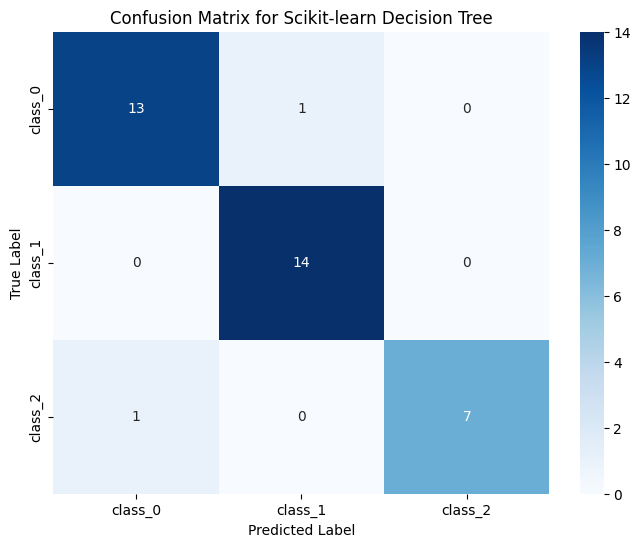

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Scikit-learn Decision Tree')
plt.show()